In [1]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

import re

%matplotlib inline

In [2]:
# Function to parse a route line into a list of node numbers
def parse_route(route_line):
    return [int(node) for node in route_line.split() if node.isdigit()]

In [3]:
problem_file_path = '/Users/ganr/Documents/GitHub/lkh3/main/parcel.vrp'
solution_file_path = '/Users/ganr/Documents/GitHub/lkh3/main/parcel-0711-2/parcel-max5000-sol-mtsp.txt' # using the mtsp solution file

# Load and process the vrp file
# TODO: change file name here
with open(problem_file_path, 'r') as file:
    vrp_data = file.read()

node_coordinates = re.findall(r'(\d+)\s+(\d+\.\d+)\s+(\d+\.\d+)', vrp_data)
node_coordinates_dict = {int(node[0]): (float(node[1]), float(node[2])) for node in node_coordinates}

# Load and process the solution file
with open(solution_file_path, 'r') as file:
    solution_data = file.read()

solution_lines = solution_data.split('\n')
print (solution_lines)
actual_route_lines = [line for line in solution_lines if line.strip() and not line.startswith('parcel') and not line.startswith('The')]
parsed_routes = [parse_route(route) for route in actual_route_lines]


['parcel, Cost: 0_1454871', 'The tours traveled by the 34 salesmen are:', '3301 1882 150 2454 469 255 1404 972 1759 1198 1999 504 492 2729 1561 2101 2090 308 745 1525 1626 2830 2413 958 1843 935 700 2779 602 2938 2422 750 512 2863 1395 2594 2997 2351 1488 3200 911 3091 1127 1131 157 80 390 1403 120 1033 1056 2515 3025 155 360 1097 222 1319 340 2880 2663 1633 3186 1001 2272 287 3157 2961 1465 1783 218 40 2547 903 3016 715 1090 995 2736 891 621 2389 3278 2512 2504 1867 793 130 1577 3207 1410 1824 1607 3247 3248 2522 2427 2037 3255 2151 3301 (#99)  Cost: 35002', '3301 160 1565 1418 2758 1707 2561 2322 1827 729 1036 2089 1645 388 1221 37 1508 1936 1344 2100 191 1046 306 1011 522 342 372 408 3048 671 136 173 2367 2492 2728 2549 899 2167 2705 1341 2950 3236 2252 2280 295 1733 2421 3080 2271 320 347 829 1190 884 215 275 219 2062 1997 1587 1672 1559 3192 2087 1505 1324 3301 (#65)  Cost: 33648', '3301 1256 3212 2219 2991 2833 2469 3296 1750 2459 2875 3160 2287 2330 2182 2622 645 9 607 1062 364 

In [4]:
def plot_route(route_idx):
    """
    Plots the specified route.

    :param route_idx: Index of the route to plot.
    """
    plt.figure(figsize=(10, 6))
    for idx, route in enumerate(parsed_routes):
        x_coords = [node_coordinates_dict[node][0] for node in route if node in node_coordinates_dict]
        y_coords = [node_coordinates_dict[node][1] for node in route if node in node_coordinates_dict]
        if idx == route_idx:
            plt.scatter(x_coords, y_coords, color='red', label=f'Route {idx + 1}', s=10)
        else:
            plt.scatter(x_coords, y_coords, color='gray', alpha=0.5, s=5)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title(f'Highlighting Route {route_idx + 1}')
    plt.legend()
    plt.grid(True)
    plt.show()



# Create a dropdown widget for selecting a route
route_selector = widgets.Dropdown(
    options=[('Route ' + str(i+1), i) for i in range(len(parsed_routes))],
    value=0,
    description='Select Route:',
)


# Create an interactive widget
interactive_plot = widgets.interactive(plot_route, route_idx=route_selector)

# Display the interactive plot
display(interactive_plot)


interactive(children=(Dropdown(description='Select Route:', options=(('Route 1', 0), ('Route 2', 1), ('Route 3…

## Comparison Plots
To visualise and compare normalised locations and original locations. 

[1.388968, 1.404375, 1.396627, 1.389868, 1.36921, 1.394109, 1.397404, 1.397692, 1.391184, 1.402059, 1.397904, 1.402964, 1.375758, 1.378448, 1.390556, 1.387413, 1.378066, 1.403474, 1.392818, 1.39007, 1.393396, 1.367588, 1.393889, 1.388402, 1.391586, 1.387652, 1.401133, 1.379725, 1.396041, 1.37337, 1.398778, 1.393628, 1.363136, 1.396194, 1.398939, 1.4026, 1.372211, 1.40137, 1.361893, 1.380448, 1.392962, 1.39894, 1.405959, 1.395825, 1.404885, 1.386398, 1.400947, 1.385795, 1.400326, 1.380933, 1.398048, 1.398734, 1.397545, 1.395787, 1.41024, 1.398285, 1.39786, 1.395002, 1.373425, 1.394156, 1.401492, 1.412436, 1.397545, 1.388834, 1.378467, 1.389951, 1.367505, 1.383177, 1.377815, 1.393388, 1.404534, 1.36299, 1.394548, 1.380032, 1.396941, 1.398516, 1.387598, 1.389931, 1.397046, 1.385622, 1.379468, 1.40353, 1.375585, 1.370083, 1.389947, 1.392799, 1.369617, 1.39323, 1.408701, 1.396241, 1.412667, 1.402436, 1.396772, 1.38529, 1.390163, 1.405078, 1.382658, 1.40204, 1.395547, 1.374484, 1.373765, 1.3

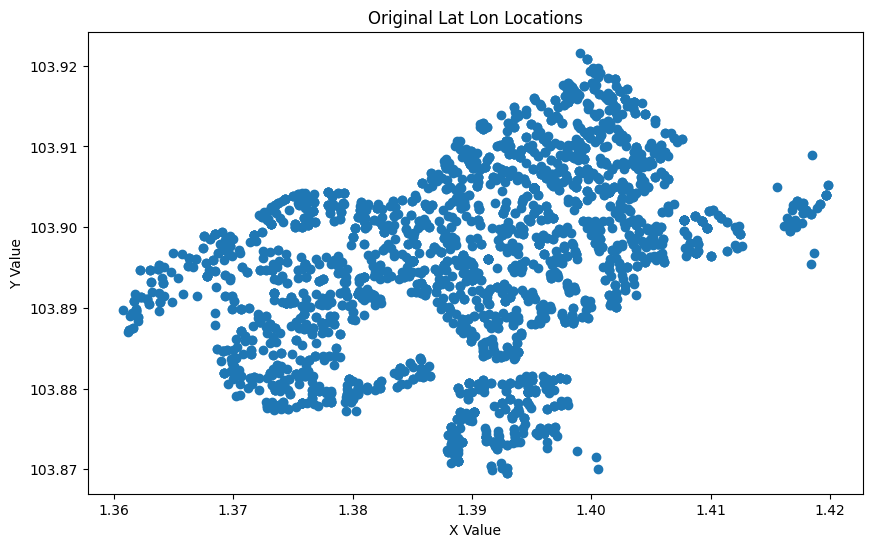

In [5]:
# for original data points

original_path = '/Users/ganr/Documents/GitHub/RBG-industry/visualisation/parcel-lat.txt' # just an extraction of all lat lon locations

def plot_scatter_vrp_file(file_path):
    x_values, y_values = [], []

    with open(file_path, 'r') as file:
        for line in file:
            x, y = line.strip().split(', ')
            x_values.append(float(x))
            y_values.append(float(y))

    print (x_values, y_values)

    plt.figure(figsize=(10, 6))
    plt.scatter(x_values, y_values)
    plt.xlabel('X Value')
    plt.ylabel('Y Value')
    plt.title('Original Lat Lon Locations')
    plt.show()
    # plt.savefig('./visualisation/original-plot.png', bbox_inches='tight', dpi=300)

plot_scatter_vrp_file(original_path)

In [6]:
import numpy as np
def read_vrplib_input(filename):
    with open(filename, 'r') as f:
        coordinates = []
        demands = []
        depots = []
        append = None
        for line in f:
            if line.startswith('NAME'):
                continue
            elif line.startswith('COMMENT'):
                continue
            elif line.startswith('TYPE'):
                ptype = line.split(':')[1].lstrip().rstrip()
            elif line.startswith('CAPACITY'):
                capacity = int(line.split(':')[1].lstrip().rstrip())
            elif line.startswith('NODE_COORD_SECTION'):
                append = coordinates
            elif line.startswith('DEMAND_SECTION'):
                append = demands
            elif line.startswith('DEPOT_SECTION'):
                append = depots
            elif line.startswith('EOF') or line.startswith('END'):
                break
            elif append is not None:
                append.append(line.rstrip().split())
        
        x = []
        y = []
        for sub_array in coordinates :
            x.append(int(sub_array[1]))
            y.append(int(sub_array[2]))

        # x = [int(sub_array[1]) for sub_array in coordinates]
        # y = [int(sub_array[2]) for sub_array in coordinates]

        # coordinates = np.array(coordinates).astype(int)[:, 1:]
        # demands = np.array(demands).astype(int)[:, 1]
        # if len(depots):
        #     depots = np.array(depots).astype(int)
        #     assert depots[0] == 1 and depots[1] == -1
        # assert demands[0] == 0
    # return coordinates, demands, capacity, ptype
    return [x,y]

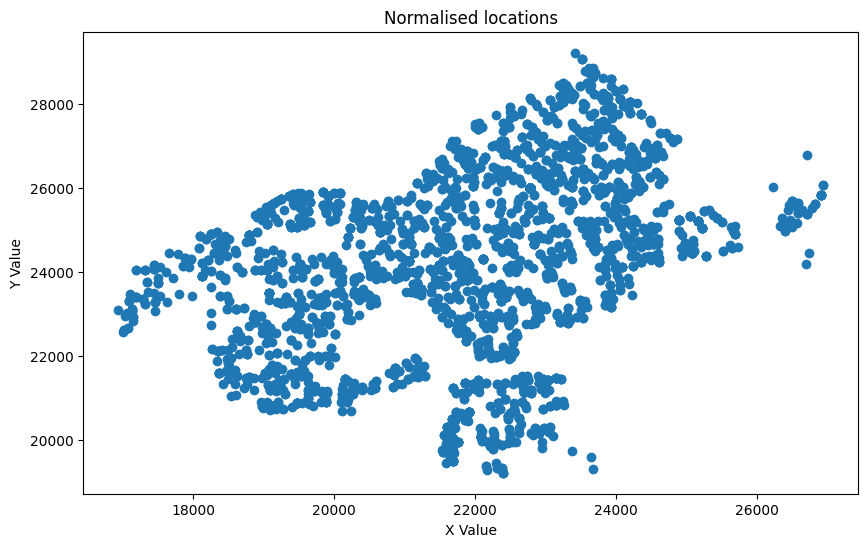

In [7]:
# normalised data

vrp_file = '/Users/ganr/Documents/GitHub/RBG-industry/visualisation/parcel-lkh.vrp'
x,y = read_vrplib_input(vrp_file)

plt.figure(figsize=(10, 6))
plt.scatter(x, y)
plt.xlabel('X Value')
plt.ylabel('Y Value')
plt.title('Normalised locations')
plt.show()
# plt.savefig('./visualisation/original-plot.png', bbox_inches='tight', dpi=300)

# plot_scatter_from_file(original_path)